# Setup

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
%matplotlib inline

Istogramma Frequenze Assolute

Errore durante la decodifica del file C:\Users\biagi\PycharmProjects\gruppo17\Dataset\Target\._.DS_Store: Formato audio non supportato: .DS_Store
Errore durante la decodifica del file C:\Users\biagi\PycharmProjects\gruppo17\Dataset\Target\._Acoustic Harassment Devices: Formato audio non supportato: 
Errore durante la decodifica del file C:\Users\biagi\PycharmProjects\gruppo17\Dataset\Target\._Acoustic release: Formato audio non supportato: 
Errore durante la decodifica del file C:\Users\biagi\PycharmProjects\gruppo17\Dataset\Target\._Echosounder: Formato audio non supportato: 
Errore durante la decodifica del file C:\Users\biagi\PycharmProjects\gruppo17\Dataset\Target\._Explosion: Formato audio non supportato: 
Errore durante la decodifica del file C:\Users\biagi\PycharmProjects\gruppo17\Dataset\Target\._Fishing pinger: Formato audio non supportato: 
Errore durante la decodifica del file C:\Users\biagi\PycharmProjects\gruppo17\Dataset\Target\._metadata-Target.csv: Formato audio non sup

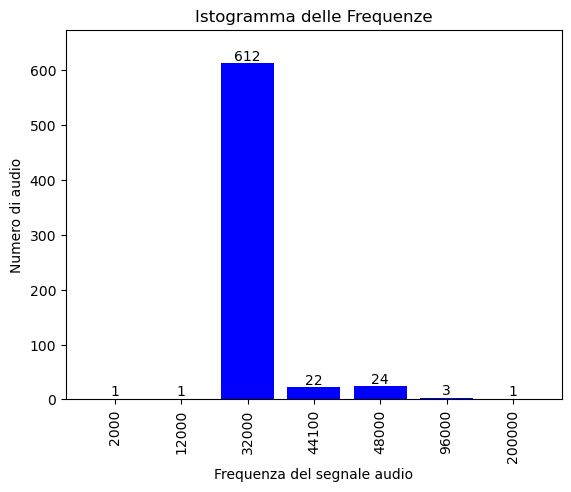

In [12]:
from Set_Data.Lettura_Freq import frequenze
import matplotlib.pyplot as plt

# Ottieni il dizionario di frequenze e numero di audio associato
frequencies = frequenze()

# Estrai le chiavi (frequenze) e i valori (numero di audio) dal dizionario
frequency_values = list(frequencies.keys())
audio_numbers = list(frequencies.values())

# Ordina le frequenze e i numeri di audio in base alle frequenze
sorted_indices = sorted(range(len(frequency_values)), key=lambda k: frequency_values[k])
sorted_frequency_values = [frequency_values[i] for i in sorted_indices]
sorted_audio_numbers = [audio_numbers[i] for i in sorted_indices]

# Crea il grafico a barre
bars = plt.bar(range(len(sorted_frequency_values)), sorted_audio_numbers, color='blue')

# Aggiungi le etichette delle frequenze sotto le barre
plt.xticks(range(len(sorted_frequency_values)), sorted_frequency_values, rotation='vertical')

plt.xlabel('Frequenza del segnale audio')
plt.ylabel('Numero di audio')
plt.title('Istogramma delle Frequenze')

# Imposta l'asse y con uno spazio aggiuntivo per l'annotazione più alta
max_audio_number = max(sorted_audio_numbers)
plt.ylim(0, max_audio_number * 1.1)  # Aumenta l'asse y del 10%

# Aggiungi annotazioni sopra le barre
for bar, audio_count in zip(bars, sorted_audio_numbers):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(audio_count),
             ha='center', va='bottom', color='black')

plt.show()  # Mostra il grafico

Errore durante l'ottenimento delle informazioni audio per il file C:\Users\biagi\PycharmProjects\gruppo17\Dataset\Target\._.DS_Store: Decoding failed. ffmpeg returned error code: 3199971767

Output from ffmpeg/avlib:

ffmpeg version 7.0-full_build-www.gyan.dev Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 13.2.0 (Rev5, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-bzlib --enable-lzma --enable-libsnappy --enable-zlib --enable-librist --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-libbluray --enable-libcaca --enable-sdl2 --enable-libaribb24 --enable-libaribcaption --enable-libdav1d --enable-libdavs2 --enable-libuavs3d --enable-libxevd --enable-libzvbi --enable-librav1e --enable-libsvtav1 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs2 --enable-libxeve 

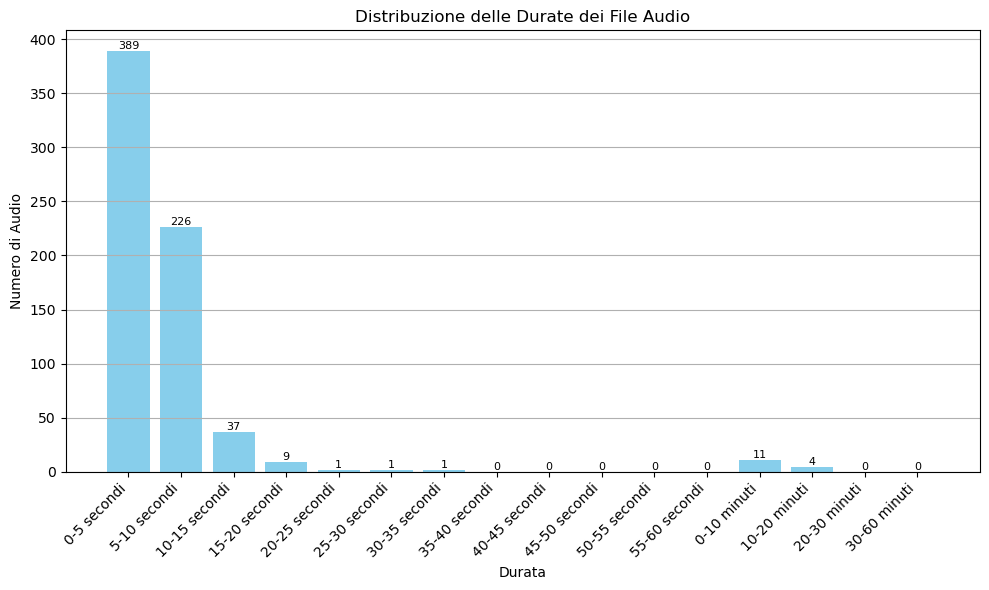

In [94]:
from Set_Data.Lettura_Durata import audio_info
import matplotlib.pyplot as plt

# Ottieni le informazioni audio
audio_info_dict = audio_info()

# Estrai i nomi dei file e le durate
file_names = list(audio_info_dict.keys())
durations_minutes = [duration[0] + duration[1] / 60 for duration in audio_info_dict.values()]  # Durata in minuti

# Raggruppiamo le durate in intervalli crescenti
intervals = [(f"{i*5}-{(i+1)*5} secondi", sum(1 for dur in durations_minutes if i*5 <= dur < (i+1)*5)) for i in range(12)]

# Convertiamo i dati di durata da minuti a secondi per gli intervalli da 30 a 60 secondi
durations_seconds = [dur * 60 for dur in durations_minutes[600:]]

# Aggiungiamo gli intervalli da 0 a 10 minuti
intervals.extend([(f"{i*10}-{(i+1)*10} minuti", sum(1 for dur in durations_seconds if i*10 <= dur < (i+1)*10)) for i in range(3)])

# Aggiungiamo l'intervallo da 30 a 60 minuti
intervals.append(("30-60 minuti", sum(1 for dur in durations_seconds if 30 * 60 <= dur <= 60 * 60)))

# Estraiamo i dati per il grafico
labels, counts = zip(*intervals)

# Creiamo il grafico a barre
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color='skyblue')

# Aggiungiamo l'annotazione del testo sopra ciascuna barra
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=8, color='black')

plt.xlabel('Durata')
plt.ylabel('Numero di Audio')
plt.title('Distribuzione delle Durate dei File Audio')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Errore durante l'ottenimento delle informazioni audio per il file C:\Users\biagi\PycharmProjects\gruppo17\Dataset\Target\._.DS_Store: Decoding failed. ffmpeg returned error code: 3199971767

Output from ffmpeg/avlib:

ffmpeg version 7.0-full_build-www.gyan.dev Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 13.2.0 (Rev5, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-bzlib --enable-lzma --enable-libsnappy --enable-zlib --enable-librist --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-libbluray --enable-libcaca --enable-sdl2 --enable-libaribb24 --enable-libaribcaption --enable-libdav1d --enable-libdavs2 --enable-libuavs3d --enable-libxevd --enable-libzvbi --enable-librav1e --enable-libsvtav1 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs2 --enable-libxeve 

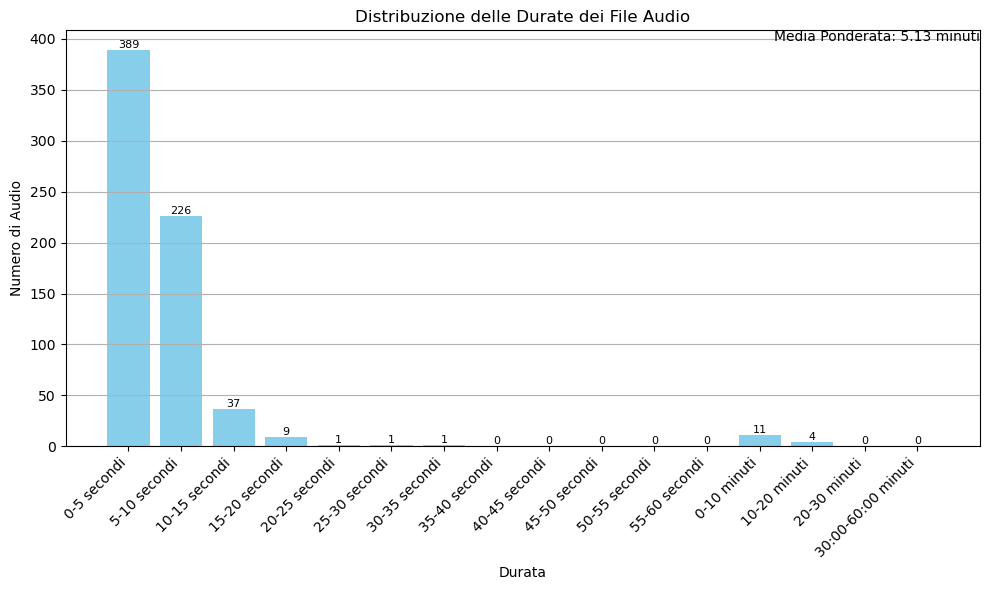

In [93]:
import re
from Set_Data.Lettura_Durata import audio_info
import matplotlib.pyplot as plt

# Ottieni le informazioni audio
audio_info_dict = audio_info()

# Estrai i nomi dei file e le durate
file_names = list(audio_info_dict.keys())
durations_minutes = [duration[0] + duration[1] / 60 for duration in audio_info_dict.values()]  # Durata in minuti

# Raggruppiamo le durate in intervalli crescenti
intervals = [(f"{i*5}-{(i+1)*5} secondi", sum(1 for dur in durations_minutes if i*5 <= dur < (i+1)*5)) for i in range(12)]

# Convertiamo i dati di durata da minuti a secondi per gli intervalli da 30 a 60 secondi
durations_seconds = [dur * 60 for dur in durations_minutes[600:]]

# Aggiungiamo gli intervalli da 0 a 10 minuti
intervals.extend([(f"{i*10}-{(i+1)*10} minuti", sum(1 for dur in durations_seconds if i*10 <= dur < (i+1)*10)) for i in range(3)])

# Aggiungiamo l'intervallo da 30 a 60 minuti
intervals.append(("30:00-60:00 minuti", sum(1 for dur in durations_seconds if 30 * 60 <= dur <= 60 * 60)))

# Estraiamo i dati per il grafico
labels, counts = zip(*intervals)

# Calcoliamo la media ponderata
weighted_sum = sum((int(re.findall(r'\d+', label.split("-")[0])[0]) + int(re.findall(r'\d+', label.split("-")[1])[0])) / 2 * count for label, count in intervals)
total_files = sum(counts)
weighted_average = weighted_sum / total_files

# Creiamo il grafico a barre
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color='skyblue')

# Aggiungiamo l'annotazione del testo sopra ciascuna barra
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=8, color='black')

# Aggiungiamo la media ponderata come annotazione
plt.annotate(f"Media Ponderata: {weighted_average:.2f} minuti", xy=(1, 1), xycoords='axes fraction', fontsize=10, ha='right', va='top')

plt.xlabel('Durata')
plt.ylabel('Numero di Audio')
plt.title('Distribuzione delle Durate dei File Audio')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
